In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This notebook contains examples of simple recommender systems using movies data. The code is transcribed from the article [Different Approaches For Building Recommender Systems Using Python](https://levelup.gitconnected.com/different-approaches-for-building-recommender-systems-using-python-1bd2179fdc8a).

## Data

In [31]:
movies = pd.read_csv('data/movies/movies.csv')

In [32]:
ratings = pd.read_csv('data/movies/ratings.csv')

In [33]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [35]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [36]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [37]:
ratings['userId'].nunique()

610

In [38]:
ratings_count = ratings.groupby(['movieId']) \
                       .agg({'rating': 'count'}) \
                       .reset_index() \
                       .sort_values(by='rating', ascending=False)

ratings_count.head()

,movieId,rating
314,356,329
277,318,317
257,296,307
510,593,279
1938,2571,278


In [39]:
df = ratings.merge(movies, how='left', on='movieId')

In [40]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [42]:
df_grouped = df.groupby(['movieId', 'title', 'genres']).agg({'rating': 'mean'}).reset_index()

In [43]:
df_grouped['genres'] = df_grouped['genres'].str.lower()
df_grouped['genres'] = df_grouped['genres'].str.replace('|', ' ', regex=False)

In [44]:
df_grouped.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),adventure animation children comedy fantasy,3.920930
1,2,Jumanji (1995),adventure children fantasy,3.431818
2,3,Grumpier Old Men (1995),comedy romance,3.259615
3,4,Waiting to Exhale (1995),comedy drama romance,2.357143
4,5,Father of the Bride Part II (1995),comedy,3.071429


## Popularity-based recommender system

In [45]:
df_grouped_sorted = df_grouped.sort_values(by='rating', ascending=False)

In [46]:
df_grouped_sorted.head()

,movieId,title,genres,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),comedy drama,5.0
8089,100556,"Act of Killing, The (2012)",documentary,5.0
9065,143031,Jump In! (2007),comedy drama romance,5.0
9076,143511,Human (2015),documentary,5.0
9078,143559,L.A. Slasher (2015),comedy crime fantasy,5.0


In [47]:
top_10_popular_movies = df_grouped_sorted.iloc[:10]
top_10_popular_movies

,movieId,title,genres,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),comedy drama,5.0
8089,100556,"Act of Killing, The (2012)",documentary,5.0
9065,143031,Jump In! (2007),comedy drama romance,5.0
9076,143511,Human (2015),documentary,5.0
9078,143559,L.A. Slasher (2015),comedy crime fantasy,5.0
4245,6201,Lady Jane (1986),drama romance,5.0
8136,102217,Bill Hicks: Revelations (1993),comedy,5.0
8130,102084,Justice League: Doom (2012),action animation fantasy,5.0
4240,6192,Open Hearts (Elsker dig for evigt) (2002),romance,5.0
9104,145994,Formula of Love (1984),comedy,5.0


The problem with the popularity-based system is that the movies with rating 5.0 have been rated by fewer users than others. We will use the weighted average to get a better recommendation system.

In [48]:
# Calculate the components

In [49]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [54]:
df_w = df.groupby(['movieId', 'title', 'genres'])['rating'] \
         .agg(['count', 'mean']) \
         .reset_index() \
         .rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

In [55]:
df_w.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [56]:
v = df_w['rating_count']
R = df_w['rating_mean']
C = df_w['rating_mean'].mean()
m = df_w['rating_count'].quantile(0.70)

In [57]:
df_w['weighted_average'] = ((R * v) + (C * m)) / (v + m)

In [58]:
df_w.head()

,movieId,title,genres,rating_count,rating_mean,weighted_average
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,3.900167
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,3.421685
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,3.259951
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143,2.809796
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429,3.095306


In [67]:
df_w_sorted = df_w.sort_values(by='weighted_average', ascending=False).reset_index()
df_w_sorted.head()

,index,movieId,title,genres,rating_count,rating_mean,weighted_average
0,277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,4.403818
1,659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,4.252950
2,2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936,4.241498
3,921,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,4.208361
4,46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204,4.237745,4.205389


In [60]:
top_10_popular_movies = df_w_sorted.iloc[:10]
top_10_popular_movies

,movieId,title,genres,rating_count,rating_mean,weighted_average
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,4.403818
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,4.252950
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936,4.241498
921,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,4.208361
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204,4.237745,4.205389
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,4.204795
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041,4.200357
913,1213,Goodfellas (1990),Crime|Drama,126,4.250000,4.198024
461,527,Schindler's List (1993),Drama|War,220,4.225000,4.195318
6693,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149,4.238255,4.194469


/Users/lilianabadillo/Projects/repo/mle-take-home-liliana-badillo/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lilianabadillo/Projects/repo/mle-take-home-liliana-badillo/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lilianabadillo/Projects/repo/mle-take-home-liliana-badillo/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


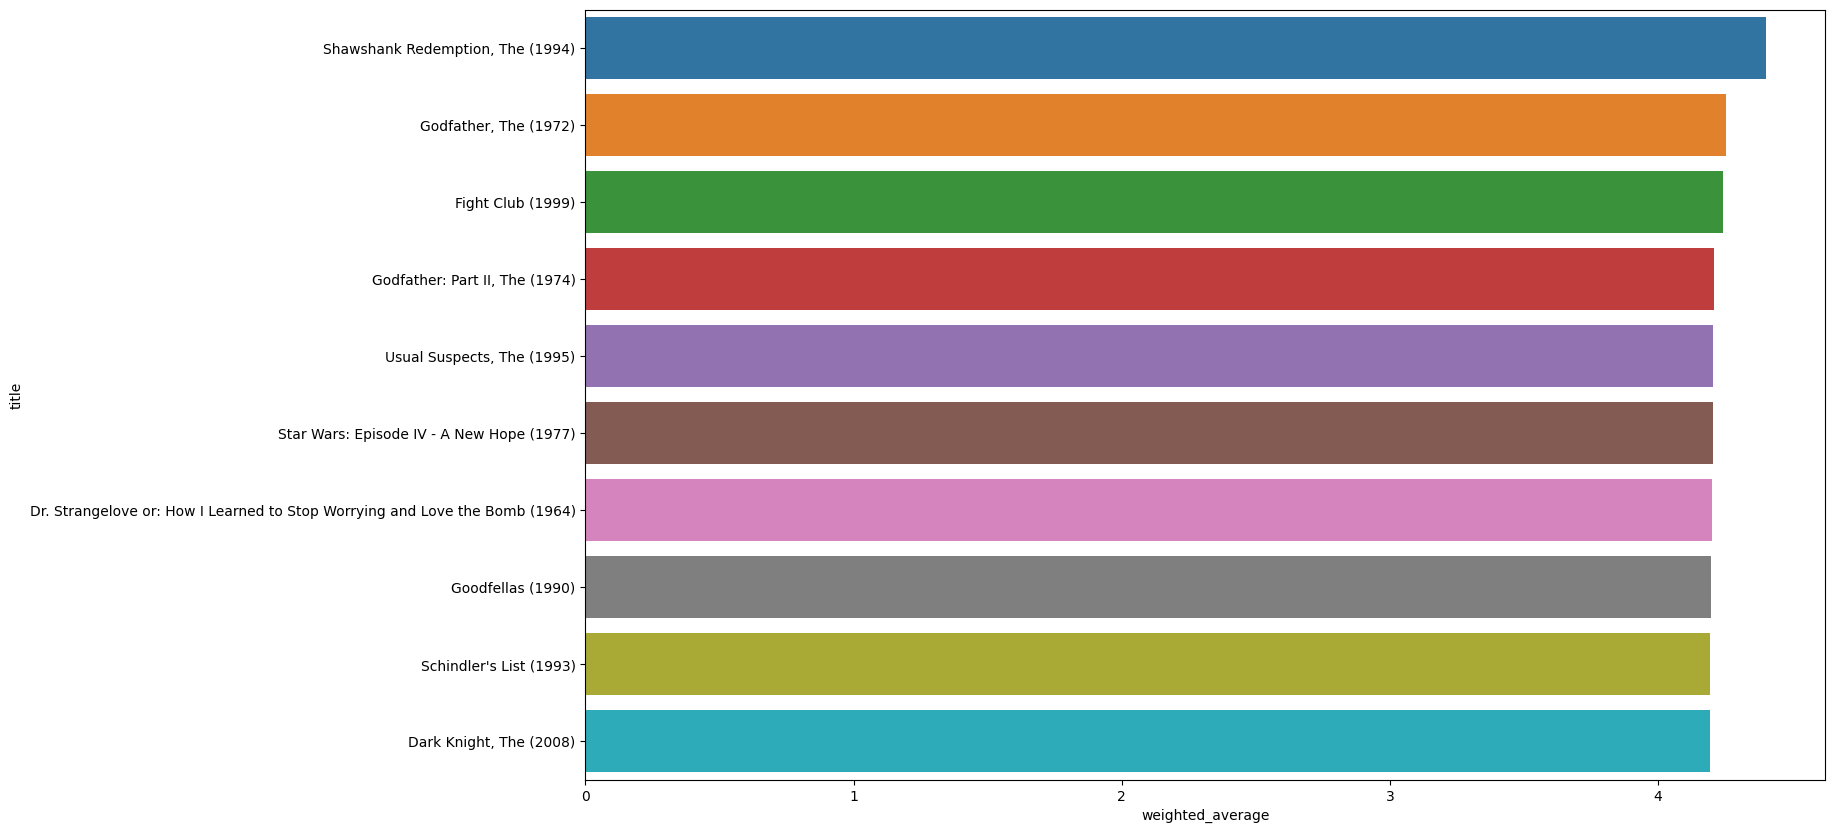

In [65]:
plt.figure(figsize=(16, 10))
sns.barplot(y='title', x='weighted_average', data=top_10_popular_movies);

## Content-based recommender system

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
# Prepare text
df_w_sorted['genres'] = df_w_sorted['genres'].str.lower()
df_w_sorted['genres'] = df_w_sorted['genres'].str.replace('|', ' ', regex=False)
df_w_sorted.head()

,index,movieId,title,genres,rating_count,rating_mean,weighted_average
0,277,318,"Shawshank Redemption, The (1994)",crime drama,317,4.429022,4.403818
1,659,858,"Godfather, The (1972)",crime drama,192,4.289062,4.252950
2,2224,2959,Fight Club (1999),action crime drama thriller,218,4.272936,4.241498
3,921,1221,"Godfather: Part II, The (1974)",crime drama,129,4.259690,4.208361
4,46,50,"Usual Suspects, The (1995)",crime mystery thriller,204,4.237745,4.205389


In [86]:
def get_title_from_index(df, index):
    return df[df.index == index]['title'].values[0]

def get_index_from_title(df, title):
    return df[df.title == title].index[0]

In [72]:
count_vec = CountVectorizer(max_features=10000)
vectors = count_vec.fit_transform(df_w_sorted['genres']).toarray()

In [76]:
vectors.shape

(9724, 24)

In [73]:
similarity = cosine_similarity(vectors)

In [75]:
similarity.shape

(9724, 9724)

In [83]:
user_liked_movie = 'Fight Club (1999)'

In [87]:
movie_index = get_index_from_title(df_w_sorted, user_liked_movie)
movie_index

2

In [88]:
similar_movies = list(enumerate(similarity[movie_index]))
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)[1: 11]
sorted_similar_movies

[(41, 1.0),
 (101, 1.0),
 (230, 1.0),
 (602, 1.0),
 (646, 1.0),
 (686, 1.0),
 (697, 1.0),
 (1058, 1.0),
 (1072, 1.0),
 (1170, 1.0)]

In [90]:
top_similar_movies = {}
for idx_movie, similarity in sorted_similar_movies:
    top_similar_movies[get_title_from_index(df_w_sorted, idx_movie)] = similarity

top_similar_movies

{'Boondock Saints, The (2000)': 1.0,
 'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)': 1.0,
 'Elite Squad (Tropa de Elite) (2007)': 1.0,
 'Killer, The (Die xue shuang xiong) (1989)': 1.0,
 'Collateral (2004)': 1.0,
 'Hard-Boiled (Lat sau san taam) (1992)': 1.0,
 'Munich (2005)': 1.0,
 'Bullitt (1968)': 1.0,
 'Clear and Present Danger (1994)': 1.0,
 'Taken (2008)': 1.0}

/Users/lilianabadillo/Projects/repo/mle-take-home-liliana-badillo/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lilianabadillo/Projects/repo/mle-take-home-liliana-badillo/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lilianabadillo/Projects/repo/mle-take-home-liliana-badillo/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/lilianabadillo/Projects/repo/mle-take-home-liliana-badillo/venv/lib

<Axes: >

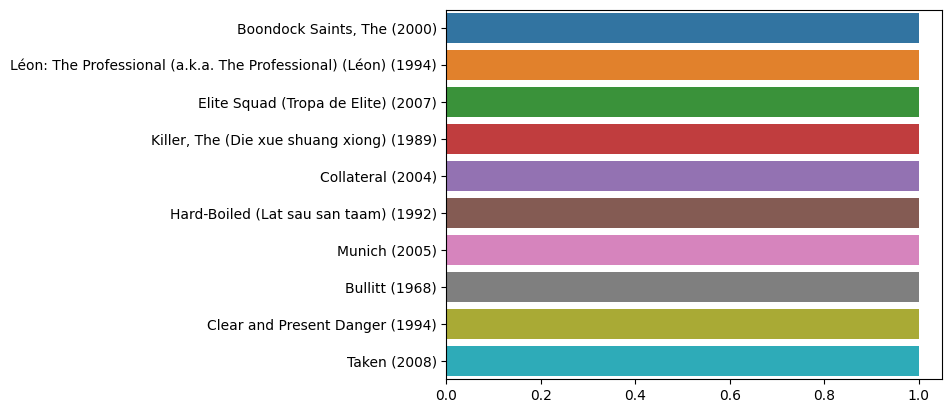

In [91]:
sns.barplot(x=list(top_similar_movies.values()), y=list(top_similar_movies.keys()))